In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import to_categorical

/Users/sahilsodhi/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/sahilsodhi/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/Users/sahilsodhi/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/sahilsodhi/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.


In [2]:
# Load the fashion-mnist train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)
x_test shape: (10000, 28, 28) y_test shape: (10000,)


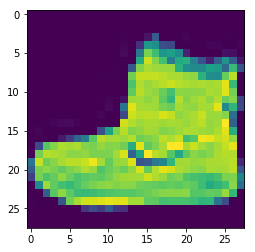

In [3]:
plt.imshow(x_train[0])

In [5]:
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

y = 0 T-shirt/top


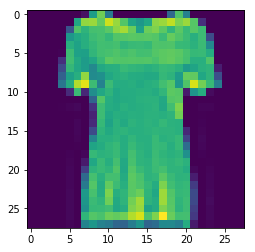

In [6]:
# Image index, you can pick any number between 0 and 59,999
img_index = 10
# y_train contains the lables, ranging from 0 to 9
label_index = y_train[img_index]
# Print the label, for example 2 Pullover
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
# # Show one of the images from the training dataset
plt.imshow(x_train[img_index])

#Normalize data dimensions so that the images are of same scale between 0 and 1.
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [7]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_valid = to_categorical(y_valid, 10)
y_test = to_categorical(y_test, 10)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


In [8]:
#Initializing the CNN model.
CNNmodel = Sequential()

# Adding Convolution layer 1.
CNNmodel.add(Convolution2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
# Adding MaxPooling layer 2.
CNNmodel.add(MaxPooling2D(pool_size=2))
# Adding a dropout layer 3 - This layer “drops out” a random set of activations in that layer by setting them to zero.
CNNmodel.add(Dropout(0.3))
# Adding Convolution layer 4.
CNNmodel.add(Convolution2D(filters=32, kernel_size=2, padding='same', activation='relu'))
# Adding MaxPooling layer 5.
CNNmodel.add(MaxPooling2D(pool_size=2))
# Adding a dropout layer 6
CNNmodel.add(Dropout(0.3))
# Flattening... put all pooled feature maps to a vector. Input to ANN.
CNNmodel.add(Flatten())
# Adding hidden layer 7.
CNNmodel.add(Dense(256, activation='relu'))
# Adding a dropout layer 8.
CNNmodel.add(Dropout(0.5))
# Adding hidden layer 9.
CNNmodel.add(Dense(10, activation='softmax'))

# Take a look at the model summary
CNNmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
__________

In [9]:
# Compiling the CNN
CNNmodel.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# Fitting the CNN to the images
result = CNNmodel.fit(x_train,
         y_train,
         batch_size=64,
         epochs=20,
         validation_data=(x_valid, y_valid))

# Evaluate the model on test set
score = CNNmodel.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])

y_hat = CNNmodel.predict(x_test)

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 52s 949us/step - loss: 0.6042 - acc: 0.7755 - val_loss: 0.3659 - val_acc: 0.8740
Epoch 2/20
55000/55000 [==============================] - 49s 894us/step - loss: 0.4137 - acc: 0.8517 - val_loss: 0.3166 - val_acc: 0.8900
Epoch 3/20
55000/55000 [==============================] - 50s 901us/step - loss: 0.3687 - acc: 0.8664 - val_loss: 0.2886 - val_acc: 0.8966
Epoch 4/20
55000/55000 [==============================] - 53s 963us/step - loss: 0.3437 - acc: 0.8745 - val_loss: 0.2780 - val_acc: 0.8988
Epoch 5/20
55000/55000 [==============================] - 56s 1ms/step - loss: 0.3222 - acc: 0.8829 - val_loss: 0.2610 - val_acc: 0.9034
Epoch 6/20
55000/55000 [==============================] - 57s 1ms/step - loss: 0.3079 - acc: 0.8845 - val_loss: 0.2530 - val_acc: 0.9052
Epoch 7/20
55000/55000 [==============================] - 52s 944us/step - loss: 0.2950 - acc: 0.8913 - val_loss: 0.2589 

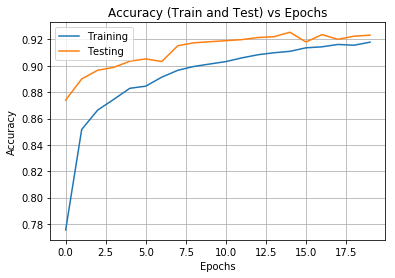

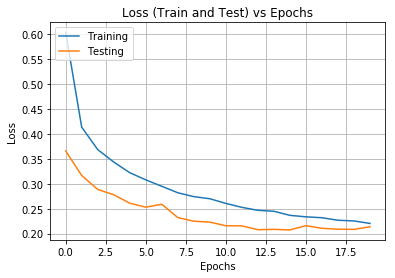

In [10]:
# Plotting accuracy, Accuracy (Train and Test) vs Epochs
plt.plot(result.history['acc'])
plt.plot(result.history['val_acc'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy (Train and Test) vs Epochs')
plt.legend(['Training', 'Testing'], loc='upper left')
plt.grid()
plt.show()

# Plotting loss Loss (Train and Test) vs Epochs
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss (Train and Test) vs Epochs')
plt.legend(['Training', 'Testing'], loc='upper left')
plt.grid()
plt.show()